In [38]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('World_Per_Capita_Electricity_Consumption.csv')
data

,Entity,Year,Per capita electricity (kWh)
0,Afghanistan,2000,22.474
1,Afghanistan,2001,27.399
2,Afghanistan,2002,30.397
3,Afghanistan,2003,39.652
4,Afghanistan,2004,36.155
...,...,...,...
5615,Zimbabwe,2015,679.553
5616,Zimbabwe,2016,486.509
5617,Zimbabwe,2017,513.434
5618,Zimbabwe,2018,632.533


In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5620 entries, 0 to 5619
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Entity                        5620 non-null   object 
 1   Year                          5620 non-null   int64  
 2   Per capita electricity (kWh)  5620 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 131.8+ KB


In [41]:
data.shape

(5620, 3)

In [42]:
data.describe()

,Year,Per capita electricity (kWh)
count,5620.000000,5620.000000
mean,2005.826157,4095.887211
std,9.238193,5403.908499
min,1985.000000,0.000000
25%,2000.000000,646.116250
50%,2007.000000,2555.821500
75%,2013.000000,5561.172750
max,2021.000000,58863.361000


In [43]:
data.isnull().sum()

Entity                          0
Year                            0
Per capita electricity (kWh)    0
dtype: int64

In [44]:
data['Entity'].unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands', 'Brunei',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon',
       'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', 'Croatia',
       'Cuba', 'Cyprus', 'Czechia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Europe', 'European Union (27)', 'Falkland Islands',
       'Fiji', 'Finland', 'France',

In [45]:
len(data['Entity'].unique())

213

In [46]:
data['Entity'].value_counts()

Latvia                  37
Czechia                 37
Spain                   37
Estonia                 37
Hungary                 37
                        ..
Malawi                  20
Ethiopia                20
Jamaica                 20
Guyana                  20
Netherlands Antilles    18
Name: Entity, Length: 213, dtype: int64

In [47]:
india_electricity_consumption = data[data['Entity']=='India']
india_electricity_consumption.head()

,Entity,Year,Per capita electricity (kWh)
2307,India,1985,237.628
2308,India,1986,252.723
2309,India,1987,272.873
2310,India,1988,288.136
2311,India,1989,318.526


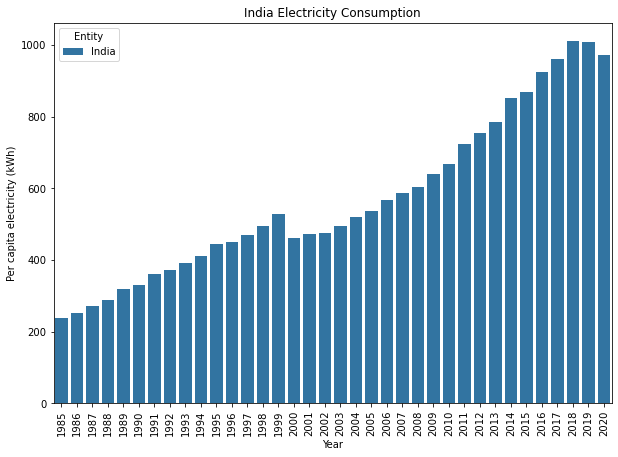

In [48]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Year',y = 'Per capita electricity (kWh)', hue = 'Entity', data = india_electricity_consumption)
plt.xticks(rotation = 90)
plt.title("India Electricity Consumption")
plt.show()

In [49]:
china_electricity_consumption = data[data['Entity'] == 'China']
china_electricity_consumption.head()

,Entity,Year,Per capita electricity (kWh)
1022,China,1985,381.828
1023,China,1986,410.524
1024,China,1987,445.542
1025,China,1988,479.211
1026,China,1989,504.861


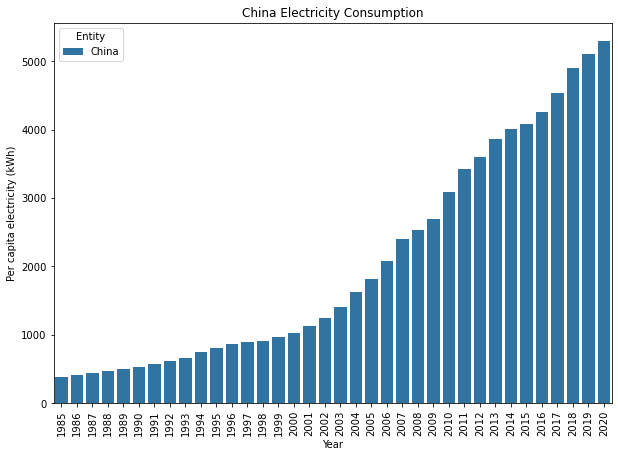

In [50]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Year', y = 'Per capita electricity (kWh)', hue = 'Entity', data = china_electricity_consumption)
plt.xticks(rotation = 90)
plt.title("China Electricity Consumption")
plt.show()

In [51]:
US_electricity_consumption = data[data['Entity'] == 'United States']
US_electricity_consumption.head()

,Entity,Year,Per capita electricity (kWh)
5301,United States,1985,11048.449
5302,United States,1986,11023.556
5303,United States,1987,11312.686
5304,United States,1988,11781.619
5305,United States,1989,12635.657


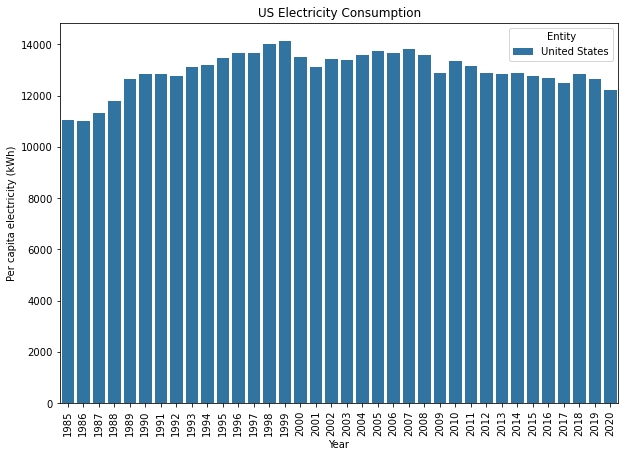

In [52]:
plt.figure(figsize = (10,7))
sns.barplot(x = 'Year', y = 'Per capita electricity (kWh)', hue = 'Entity', data = US_electricity_consumption)
plt.xticks(rotation = 90)
plt.title("US Electricity Consumption")
plt.show()

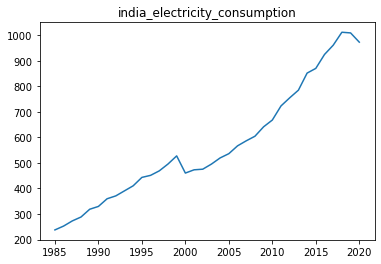

In [53]:
plt.plot(data['Year'][data['Entity'] =='India'], data['Per capita electricity (kWh)'][data['Entity'] == "India"])
plt.title("india_electricity_consumption")
plt.show()         

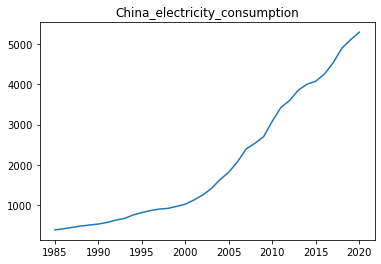

In [54]:
plt.plot(data['Year'][data['Entity'] =='China'], data['Per capita electricity (kWh)'][data['Entity'] == "China"])
plt.title("China_electricity_consumption")
plt.show()         

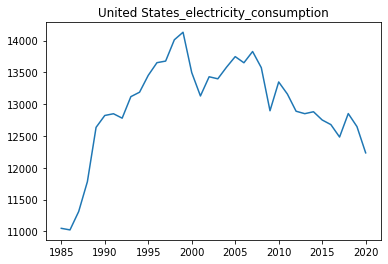

In [55]:
plt.plot(data['Year'][data['Entity'] =='United States'], data['Per capita electricity (kWh)'][data['Entity'] == "United States"])
plt.title("United States_electricity_consumption")
plt.show()         

In [56]:
x = india_electricity_consumption.drop(['Per capita electricity (kWh)' , 'Entity'], axis=1)
y = india_electricity_consumption['Per capita electricity (kWh)']

In [57]:
x.shape

(36, 1)

In [58]:
y.shape

(36,)

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split( x , y , random_state =42)

In [60]:
model_india = LinearRegression()
model_india.fit(x,y)

LinearRegression()

In [61]:
print("Coefficient:",model_india.coef_)
print("intercept:", model_india.intercept_)
pre = model_india.predict(x)

Coefficient: [21.11990232]
intercept: -41723.12313899615


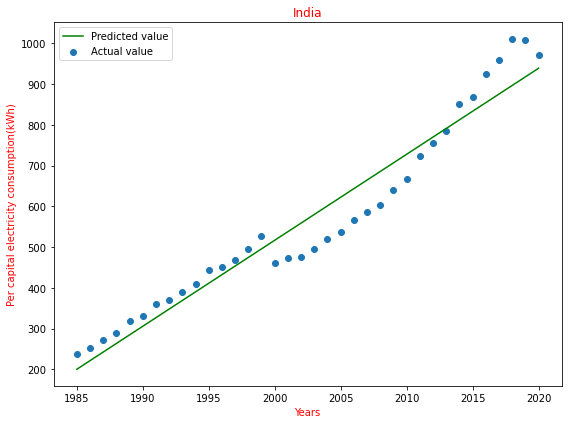

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,label = 'Actual value')
plt.plot(x,pre,color='g',label= 'Predicted value')
plt.legend()
plt.title("India",color='r')
plt.xlabel("Years",color='r')
plt.ylabel("Per capital electricity consumption(kWh)", color='r')
plt.tight_layout()
plt.show()

In [63]:
import warnings
warnings.filterwarnings("ignore")

In [64]:
years = [2021,2022,2023,2024,2025]
for i in years:
    print(model_india.predict([[i]]))

[960.19944286]
[981.31934517]
[1002.43924749]
[1023.55914981]
[1044.67905212]


In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
print("By function:",mean_squared_error(y,model_india.predict(x)))

By function: 3107.0183018244293


In [73]:
x = china_electricity_consumption.drop(['Per capita electricity (kWh)' , 'Entity'], axis=1)
y = china_electricity_consumption['Per capita electricity (kWh)']

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split( x , y , random_state =42)

In [75]:
model_china = LinearRegression()
model_china.fit(x,y)

LinearRegression()

In [76]:
print("Coefficient:",model_china.coef_)
print("intercept:", model_china.intercept_)
pre = model_china.predict(x)

Coefficient: [144.66853256]
intercept: -287644.1720647791


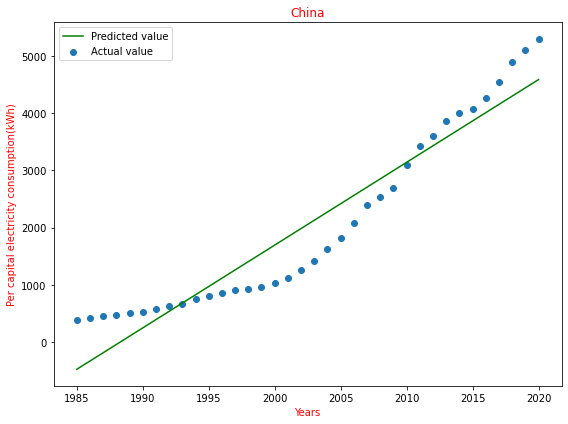

In [77]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,label = 'Actual value')
plt.plot(x,pre,color='g',label= 'Predicted value')
plt.legend()
plt.title("China",color='r')
plt.xlabel("Years",color='r')
plt.ylabel("Per capital electricity consumption(kWh)", color='r')
plt.tight_layout()
plt.show()

In [78]:
import warnings
warnings.filterwarnings("ignore")

In [79]:
years = [2021,2022,2023,2024,2025]
for i in years:
    print(model_china.predict([[i]]))

[4730.93224127]
[4875.60077383]
[5020.26930639]
[5164.93783895]
[5309.60637151]


In [80]:
print("By function:",mean_squared_error(y,model_china.predict(x)))

By function: 225359.50871213025


In [81]:
x = US_electricity_consumption.drop(['Per capita electricity (kWh)' , 'Entity'], axis=1)
y = US_electricity_consumption['Per capita electricity (kWh)']

In [82]:
x.shape

(36, 1)

In [83]:
y.shape

(36,)

In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x_train, x_test , y_train , y_test = train_test_split( x , y , random_state =42)

In [85]:
model_US =LinearRegression()
model_US.fit(x,y)

LinearRegression()

In [86]:
print("Coefficient:",model_US.coef_)
print("intercept:", model_US.intercept_)
pre = model_US.predict(x)

Coefficient: [18.66015328]
intercept: -24394.77808580007


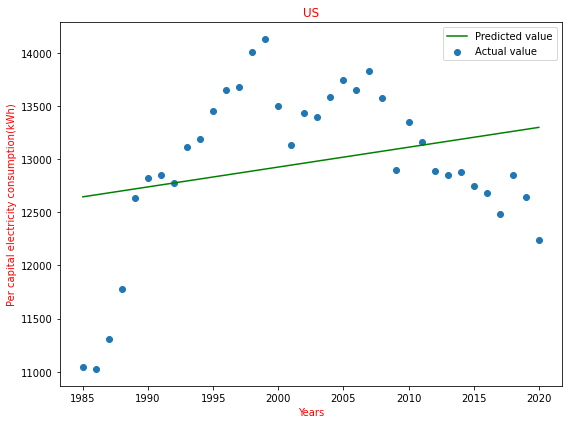

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(x,y,label = 'Actual value')
plt.plot(x,pre,color='g',label= 'Predicted value')
plt.legend()
plt.title("US",color='r')
plt.xlabel("Years",color='r')
plt.ylabel("Per capital electricity consumption(kWh)", color='r')
plt.tight_layout()
plt.show()

In [89]:
years = [2021,2022,2023,2024,2025]
for i in years:
    print(model_US.predict([[i]]))

[13317.39169683]
[13336.05185011]
[13354.71200339]
[13373.37215667]
[13392.03230995]


In [90]:
print("By function:",mean_squared_error(y,model_US.predict(x)))

By function: 518207.581287751
